In [3]:
import pandas as pd
import pdb
from pathlib import Path
from fastai.vision import *
from fastai.vision.gan import *

In [9]:
simDataX = np.linspace(0,2*np.pi,100)
amp,freq = np.random.rand(10000,1), np.random.rand(10000,1) * np.pi
simDataY = amp * np.sin(freq * simDataX.reshape(1,-1))
ls = np.concatenate([amp,freq],axis=1)

In [10]:
yT = torch.tensor(simDataY,dtype=torch.float)
lsT = torch.tensor(ls,dtype=torch.float)

trainDS = torch.utils.data.TensorDataset(lsT[:8000],yT[:8000].squeeze(-1))
valDS = torch.utils.data.TensorDataset(lsT[8000:],yT[8000:].squeeze(-1))
trainDS.items = [1,2,3]
valDS.items = [1,2,3]
data = DataBunch.create(trainDS,valDS,num_workers=0)

In [44]:
class SineDec(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.rnn = torch.nn.LSTM(2,200,1,batch_first=True,bias=False)
        self.out = torch.nn.Linear(200,1)
    
    def forward(self, ls):
        ls = ls.unsqueeze(1).expand(-1,100,-1)
        output, _ = self.rnn(ls)
        return self.out(output).squeeze(-1)

In [45]:
model = SineDec()
learn = Learner(data,model,loss_func=torch.nn.functional.mse_loss)

In [46]:
x,y = next(iter(data.train_dl))
model(x).size()

torch.Size([64, 100])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


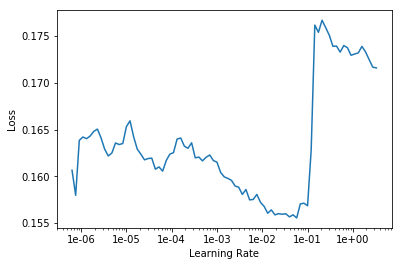

In [47]:
learn.lr_find()
learn.recorder.plot()

In [49]:
learn.fit_one_cycle(10,1e-3)

epoch,train_loss,valid_loss
1,0.003548,0.002806
2,0.002649,0.001639
3,0.001824,0.001215
4,0.002124,0.001192
5,0.001055,0.000727
6,0.000786,0.000572
7,0.000496,0.000435
8,0.000397,0.000392
9,0.000338,0.000340
10,0.000317,0.000330


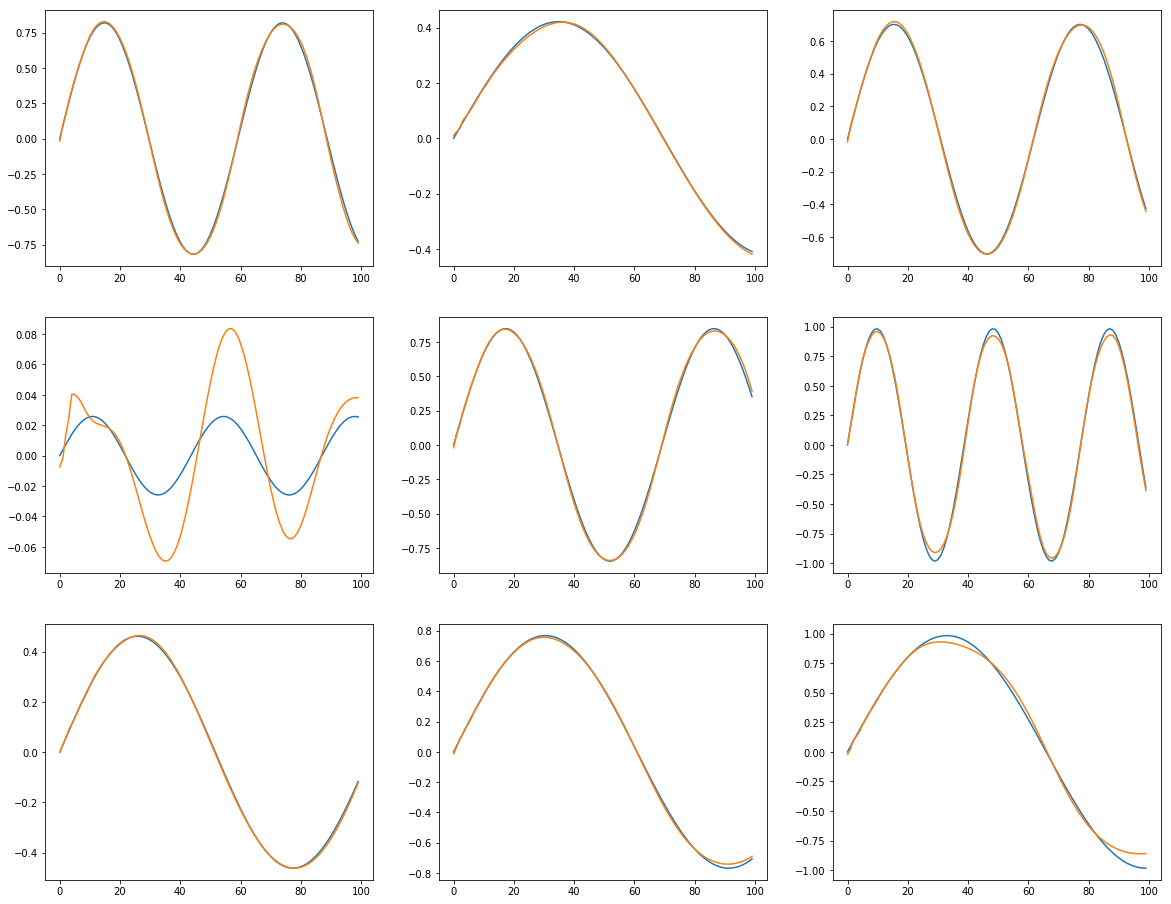

In [50]:
learn.model.eval()
out = learn.model(x)
_,axes = plt.subplots(3,3,figsize=(20,16))

for o,r,ax in zip(y,out,axes.flatten()):
    ax.plot(o.flatten())
    ax.plot(r)